<a href="https://colab.research.google.com/github/JuliaKut/Neural-network/blob/main/Laba32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [32]:
# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/5
800/800 [==============================] - 49s 61ms/step - loss: 1.8161 - accuracy: 0.3167 - val_loss: 1.2725 - val_accuracy: 0.5353
Epoch 2/5
800/800 [==============================] - 48s 60ms/step - loss: 1.2288 - accuracy: 0.5540 - val_loss: 1.0764 - val_accuracy: 0.6266
Epoch 3/5
800/800 [==============================] - 48s 60ms/step - loss: 1.0142 - accuracy: 0.6423 - val_loss: 1.0543 - val_accuracy: 0.6329
Epoch 4/5
800/800 [==============================] - 48s 60ms/step - loss: 0.8807 - accuracy: 0.6901 - val_loss: 0.9440 - val_accuracy: 0.6691
Epoch 5/5
800/800 [==============================] - 48s 60ms/step - loss: 0.7804 - accuracy: 0.7249 - val_loss: 0.8708 - val_accuracy: 0.6983
Test loss: 0.8715122938156128 / Test accuracy: 0.6972000002861023


[[7.3271024e-01 4.6843435e-03 2.3396753e-02 3.2895545e-03 5.3117495e-02
  4.0249745e-04 1.2811780e-03 2.5396285e-04 1.7889464e-01 1.9694269e-03]]
 На даній картинці зображена: літак


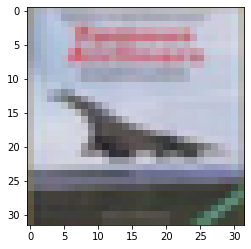

In [46]:
n = 3
x = np.expand_dims(input_test[n], axis=0)
res = model.predict(x)
print( res )

if np.argmax(res)==0:
  name='літак'
elif np.argmax(res)==1:
  name='автомобіль'
elif np.argmax(res)==2:
  name='птах'
elif np.argmax(res)==3:
  name='кіт'
elif np.argmax(res)==4:
  name='олень'
elif np.argmax(res)==5:
  name='собака'
elif np.argmax(res)==6:
  name='жаба'
elif np.argmax(res)==7:
  name='кінь'
elif np.argmax(res)==8:
  name='корабель'
elif np.argmax(res)==9:
  name='вантажівка'


print(f" На даній картинці зображена: {name}" )

plt.imshow(input_test[n], cmap=plt.cm.binary)
plt.show()